In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns 

In [82]:
# the csv file we have contains the data of thhe BitCoin price from 2022-01-01 to 2023-12-31
# we will use this data to predict the price of the BitCoin in the future using the ARIMA , LSTM and Prophet models
# we will start by loading the data and visu# the csv file we have contains the data of thhe BitCoin price from 2022-01-01 to 2023-12-31
# we will use this data to predict the price of the BitCoin in the future using the ARIMA , LSTM and Prophet models
# we will start by loading the data and visualizing it
data_btc = pd.read_csv('BTC-USD.csv')
#data_btc.head()

data_eth = pd.read_csv('ETH-USD.csv')
#data_eth.head()

data_ada= pd.read_csv('ADA-USD.csv')

## Basic Visualizations :

In [83]:
import plotly.express as px

# Creating an interactive scatter plot for Open, High, Low, and Close prices of Bitcoin
fig = px.scatter(data_btc, x='Date', y=['Open', 'High', 'Low', 'Close'],
                 labels={'value': 'Price (USD)', 'variable': 'Price Type'},
                 title='Bitcoin (BTC) Price: Open, High, Low, Close')

# Setting different colors for each price type
fig.update_traces(marker=dict(size=5),
                  selector=dict(type='scatter', mode='markers'),height=1000)

# Enhancing interactivity
fig.update_layout(hovermode='closest')
fig.show()


In [84]:
# # Question number 1, we have to visualize the data of the BitCoin, Ethereum and Cardano in a single plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_btc['Date'], y=data_btc['Close'], mode='lines', name='BitCoin'))
fig.add_trace(go.Scatter(x=data_eth['Date'], y=data_eth['Close'], mode='lines', name='Ethereum'))
fig.add_trace(go.Scatter(x=data_ada['Date'], y=data_ada['Close'], mode='lines', name='Cardano'))
fig.update_layout(title='BitCoin, Ethereum and Cardano Prices', xaxis_title='Date', yaxis_title='Price',height=1000)
fig.show()
#

## All time high and lows

In [85]:
# Finding the all-time high and all-time low for Bitcoin (BTC)

# All-time high
all_time_high = data_btc['High'].max()
all_time_high_date = data_btc[data_btc['High'] == all_time_high]['Date'].iloc[0]

# All-time low
all_time_low = data_btc['Low'].min()
all_time_low_date =data_btc[data_btc['Low'] == all_time_low]['Date'].iloc[0]
print(f"The highest values for BitCoin was {all_time_high} on {all_time_high_date} and the lowest value was {all_time_low} on {all_time_low_date}")
#all_time_high, all_time_high_date, all_time_low, all_time_low_date

# do the same for all_time_high and all_time_ of eth and cardano
# All-time high
all_time_high_eth = data_eth['High'].max()
all_time_high_date_eth = data_eth[data_eth['High'] == all_time_high_eth]['Date'].iloc[0]

# All-time low
all_time_low_eth = data_eth['Low'].min()
all_time_low_date_eth =data_eth[data_eth['Low'] == all_time_low_eth]['Date'].iloc[0]
print(f"The following are the highest and lowest values for Ethereum: {all_time_high_eth} on {all_time_high_date_eth} and {all_time_low_eth} on {all_time_low_date_eth}")
#all_time_high_eth, all_time_high_date_eth, all_time_low_eth, all_time_low_date_eth

# All-time high
all_time_high_ada = data_ada['High'].max()
all_time_high_date_ada = data_ada[data_ada['High'] == all_time_high_ada]['Date'].iloc[0]

# All-time low
all_time_low_ada = data_ada['Low'].min()
all_time_low_date_ada =data_ada[data_ada['Low'] == all_time_low_ada]['Date'].iloc[0]

#all_time_high_ada, all_time_high_date_ada, all_time_low_ada, all_time_low_date_ada
print(f"The maximum number of Cardano was {all_time_high_ada} on {all_time_high_date_ada} and the minimum was {all_time_low_ada} on {all_time_low_date_ada}")

The highest values for BitCoin was 48086.835938 on 2022-03-28 and the lowest value was 15599.046875 on 2022-11-21
The following are the highest and lowest values for Ethereum: 3876.785156 on 2022-01-04 and 896.109009 on 2022-06-18
The maximum number of Cardano was 1.631298 on 2022-01-18 and the minimum was 0.23042 on 2023-06-10


## Percentage Increase in the Price 

In [86]:
# Parsing the 'Date' column correctly and grouping data by Year-Month
data_btc['Date'] = pd.to_datetime(data_btc['Date'])
data_btc['YearMonth'] = data_btc['Date'].dt.to_period('M')
monthly_data = data_btc.groupby('YearMonth').agg({'Open': 'first', 'Close': 'last'})

# Calculating the monthly percentage increase
monthly_data['Percentage Increase'] = ((monthly_data['Close'] - monthly_data['Open']) / monthly_data['Open']) * 100

# Finding the month with the highest percentage increase
max_increase_month = monthly_data['Percentage Increase'].idxmax()
max_increase_value = monthly_data['Percentage Increase'].max()

monthly_data.head()
# create a new column named "Month number" and give it the value of the month number
monthly_data['Month number'] = monthly_data.index.month
#monthly_data.head()

# max_increase_month, max_increase_value
print(f"The monthly data for BitCoin shows that the month with the highest percentage increase was {max_increase_month} with a value of {max_increase_value}")

The monthly data for BitCoin shows that the month with the highest percentage increase was 2023-01 with a value of 39.83202423523487


In [87]:
# Parsing the 'Date' column correctly and grouping data by Year-Month
data_eth['Date'] = pd.to_datetime(data_eth['Date'])
data_eth['YearMonth'] = data_eth['Date'].dt.to_period('M')
monthly_data = data_eth.groupby('YearMonth').agg({'Open': 'first', 'Close': 'last'})

# Calculating the monthly percentage increase
monthly_data['Percentage Increase'] = ((monthly_data['Close'] - monthly_data['Open']) / monthly_data['Open']) * 100

# Finding the month with the highest percentage increase
max_increase_month = monthly_data['Percentage Increase'].idxmax()
max_increase_value = monthly_data['Percentage Increase'].max()

# max_increase_month, max_increase_value
print(f"The monthly data for Etherium shows that the month with the highest percentage increase was {max_increase_month} with a value of {max_increase_value}")

The monthly data for Etherium shows that the month with the highest percentage increase was 2022-07 with a value of 57.39875831510395


In [88]:
# Parsing the 'Date' column correctly and grouping data by Year-Month
data_ada['Date'] = pd.to_datetime(data_ada['Date'])
data_ada['YearMonth'] = data_ada['Date'].dt.to_period('M')
monthly_data = data_ada.groupby('YearMonth').agg({'Open': 'first', 'Close': 'last'})

# Calculating the monthly percentage increase
monthly_data['Percentage Increase'] = ((monthly_data['Close'] - monthly_data['Open']) / monthly_data['Open']) * 100

# Finding the month with the highest percentage increase
max_increase_month = monthly_data['Percentage Increase'].idxmax()
max_increase_value = monthly_data['Percentage Increase'].max()

# max_increase_month, max_increase_value
print(f"The monthly data for Cardano shows that the month with the highest percentage increase was {max_increase_month} with a value of {max_increase_value}")

The monthly data for Cardano shows that the month with the highest percentage increase was 2023-01 with a value of 58.64601848920922


## Candle Stick Visualization

In [89]:
# we have to visualize the data of the Ethereum using candlestick chart. we have to make sure that it is interactive and candlestick chart is perfect
fig = go.Figure(data=[go.Candlestick(x=data_btc['Date'],
                open=data_btc['Open'],
                high=data_btc['High'],
                low=data_btc['Low'],
                close=data_btc['Close'])])
# fig.update_layout(title='BitCoin Price', xaxis_title='Date', yaxis_title='Price')
# fig.show()
fig.update_layout(title='BitCoin Price', xaxis_title='Date', yaxis_title='Price', height=800)
fig.show()


In [90]:
# do the same for ethereum
fig2 = go.Figure(data=[go.Candlestick(x=data_eth['Date'],
                open=data_eth['Open'],
                high=data_eth['High'],
                low=data_eth['Low'],
                close=data_eth['Close'])])
# show volume
fig2.update_layout(title='Ethereum Price', xaxis_title='Date', yaxis_title='Price',height=800)
fig2.show()

In [91]:
# now we have to visualize the data of the Cardano using candlestick chart
fig3 = go.Figure(data=[go.Candlestick(x=data_ada['Date'],
                open=data_ada['Open'],
                high=data_ada['High'],
                low=data_ada['Low'],
                close=data_ada['Close'])])
fig3.update_layout(title='Cardano Price', xaxis_title='Date', yaxis_title='Price', height=800)
fig3.show()

## Coming towards the model implementation

### Model 1: Linear regression


R-squared: 0.9932155975565543
Mean Squared Error: 438381.6180492013


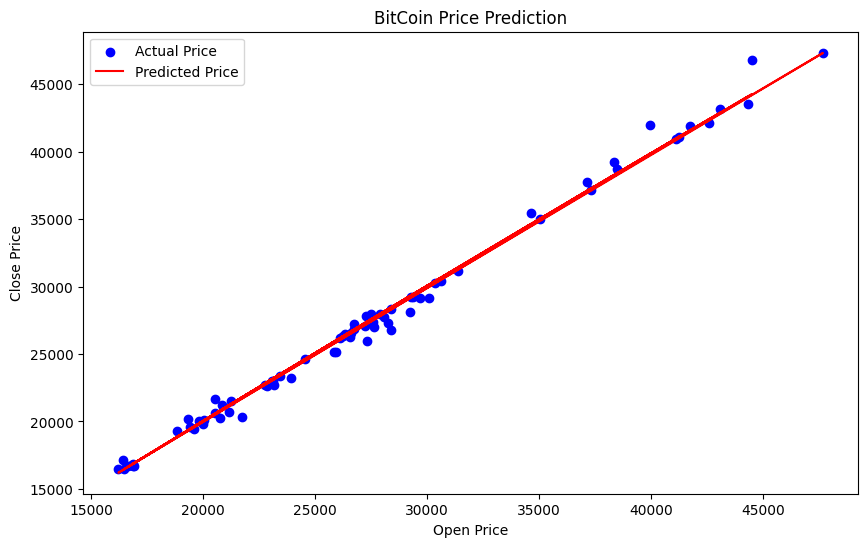

The accuracy of the model is 99.32155975565543%


In [92]:
# we will first apply linear regression to the data of the BitCoin and then we will use the ARIMA model to predict the price of the BitCoin in the future
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Using these values from 2 years, we will train our model to predict the price of the BitCoin in the future
# our X variable will be the date and the y variable will be the price of the BitCoin
X = data_btc['Open'].values
y = data_btc['Close'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Fitting the linear regression model
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X_train.reshape(-1, 1), y_train)

# Predicting the test set results
y_pred = model.predict(X_test.reshape(-1, 1))

# Calculating the R-squared value
r2 = r2_score(y_test, y_pred)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Printing the results
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')


# also print the accuracy of the model
# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Price')
plt.plot(X_test, y_pred, color='red', label='Predicted Price')
plt.title('BitCoin Price Prediction')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# print accuracy of the model
print(f"The accuracy of the model is {r2*100}%")

In [93]:
# predict the value of bitcoin of 2-jan-2024
# Predicting the price of BitCoin on 2nd January 2024
predicted_price = model.predict([[X[-1]]]) # using the last value of the Open price as the input
print(f"The predicted price of BitCoin on 1st January 2024 is {predicted_price[0]}")


The predicted price of BitCoin on 1st January 2024 is 41989.435126766955


R-squared: 0.9892649678868489
Mean Squared Error: 3457.1234599567356


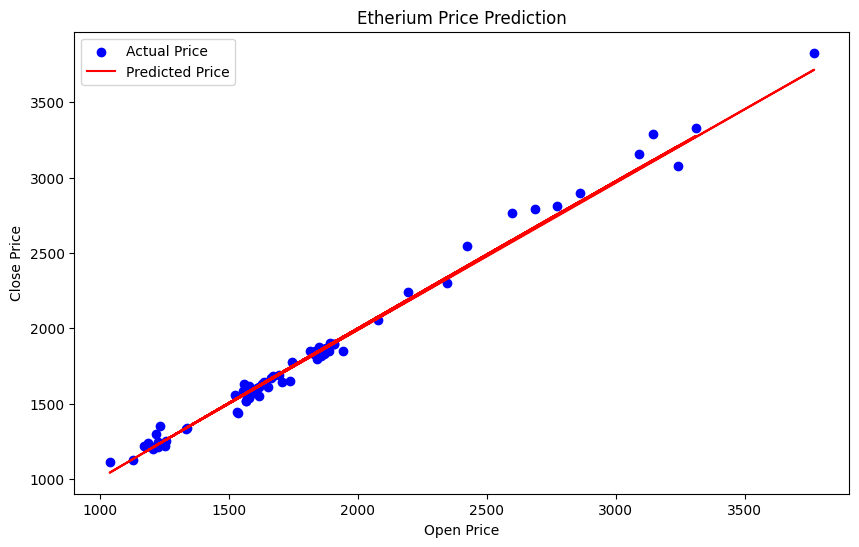

The accuracy of the model is 98.92649678868489%


In [94]:
# we will first apply linear regression to the data of the BitCoin and then we will use the ARIMA model to predict the price of the BitCoin in the future
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Using these values from 2 years, we will train our model to predict the price of the BitCoin in the future
# our X variable will be the date and the y variable will be the price of the BitCoin
X = data_eth['Open'].values
y = data_eth['Close'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Fitting the linear regression model
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X_train.reshape(-1, 1), y_train)

# Predicting the test set results
y_pred = model.predict(X_test.reshape(-1, 1))

# Calculating the R-squared value
r2 = r2_score(y_test, y_pred)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Printing the results
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')


# also print the accuracy of the model
# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Price')
plt.plot(X_test, y_pred, color='red', label='Predicted Price')
plt.title('Etherium Price Prediction')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# print the accuracy of the model
print(f"The accuracy of the model is {r2*100}%")   

In [95]:
# predict the value of bitcoin of 2-jan-2024
# Predicting the price of BitCoin on 2nd January 2024
predicted_price = model.predict([[X[-1]]]) # using the last value of the Open price as the input
print(f"The predicted price of Etherium on 2nd January 2024 is {predicted_price[0]}")

The predicted price of Etherium on 2nd January 2024 is 2287.215769553388


R-squared: 0.9965840923839263
Mean Squared Error: 0.00025384795801931055


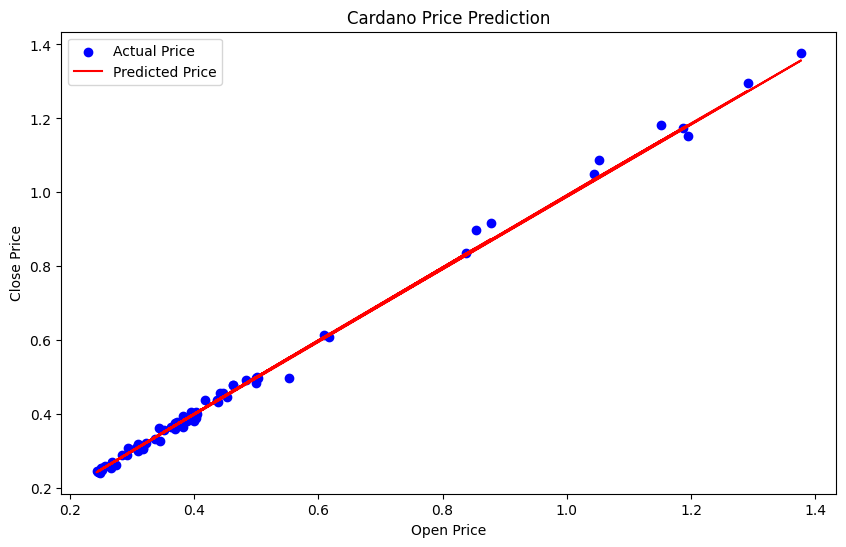

The accuracy of the model is 99.65840923839264%


In [96]:
# we will first apply linear regression to the data of the BitCoin and then we will use the ARIMA model to predict the price of the BitCoin in the future
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Using these values from 2 years, we will train our model to predict the price of the BitCoin in the future
# our X variable will be the date and the y variable will be the price of the BitCoin
X = data_ada['Open'].values
y = data_ada['Close'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Fitting the linear regression model
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X_train.reshape(-1, 1), y_train)

# Predicting the test set results
y_pred = model.predict(X_test.reshape(-1, 1))

# Calculating the R-squared value
r2 = r2_score(y_test, y_pred)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Printing the results
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')


# also print the accuracy of the model
# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Price')
plt.plot(X_test, y_pred, color='red', label='Predicted Price')
plt.title('Cardano Price Prediction')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# print the accuracy of the model
print(f"The accuracy of the model is {r2*100}%")

In [97]:
# predict the value of bitcoin of 2-jan-2024
# Predicting the price of BitCoin on 2nd January 2024
predicted_price = model.predict([[X[-1]]]) # using the last value of the Open price as the input
print(f"The predicted price of Cardano on 2nd January 2024 is {predicted_price[0]}")

The predicted price of Cardano on 2nd January 2024 is 0.6018108539035687


# Predictions of Linear Regression on 2nd January 2024

## Bitcoin:
### Actual Value of closing : 44,957
### Predicted Value of closing: 41,989

## Ethereum:
### Actual Value of closing : 2,269
### Predicted Value of closing: 2,287

## Cardano:
### Actual Value of closing : 0.57
### Predicted Value of closing: 0.60

## LSTM

In [98]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Load the Bitcoin price data
data = data_btc

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['High', 'Low', 'Open', 'Close']])

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Define the number of time steps and features
time_steps = 30
num_features = 4

# Create the training data
X_train = []
y_train = []
for i in range(time_steps, len(train_data)):
    X_train.append(train_data[i - time_steps:i])
    y_train.append(train_data[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# Create the testing data
X_test = []
y_test = []
for i in range(time_steps, len(test_data)):
    X_test.append(test_data[i - time_steps:i])
    y_test.append(test_data[i])
X_test, y_test = np.array(X_test), np.array(y_test)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(time_steps, num_features)))
model.add(LSTM(units=100, return_sequences=False)) 
# add more lstm layers
#model.add(LSTM(units=50))
model.add(Dense(units=num_features))
model.add(Dense(units=num_features))
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Inverse scale the predictions
predictions = scaler.inverse_transform(predictions)

# Print the predictions
print(predictions)

# now predict the price of the bitcoin on 2-jan-2024
# Predicting the price of BitCoin on 2nd January 2024

# Get the last 30 days of dat

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 30, 100)           42000     
                                                                 
 lstm_15 (LSTM)              (None, 100)               80400     
                                                                 
 dense_14 (Dense)            (None, 4)                 404       
                                                                 
 dense_15 (Dense)            (None, 4)                 20        
                                                                 
Total params: 122824 (479.78 KB)
Trainable params: 122824 (479.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
18/18 [==============================] - 4s 31ms/step - loss: 0.0535
Epoch 2/25
18/18 [==============================] - 1s 31ms/step -

18/18 [==============================] - 1s 40ms/step - loss: 0.0045
Epoch 6/25
18/18 [==============================] - 1s 31ms/step - loss: 0.0041
Epoch 7/25
18/18 [==============================] - 0s 28ms/step - loss: 0.0037
Epoch 8/25
18/18 [==============================] - 1s 30ms/step - loss: 0.0034
Epoch 9/25
18/18 [==============================] - 1s 28ms/step - loss: 0.0036
Epoch 10/25
18/18 [==============================] - 0s 28ms/step - loss: 0.0038
Epoch 11/25
18/18 [==============================] - 1s 28ms/step - loss: 0.0029
Epoch 12/25
18/18 [==============================] - 0s 28ms/step - loss: 0.0026
Epoch 13/25
18/18 [==============================] - 1s 28ms/step - loss: 0.0026
Epoch 14/25
18/18 [==============================] - 1s 28ms/step - loss: 0.0025
Epoch 15/25
18/18 [==============================] - 1s 30ms/step - loss: 0.0022
Epoch 16/25
18/18 [==============================] - 1s 33ms/step - loss: 0.0022
Epoch 17/25
18/18 [=========================

In [99]:

input_data = scaled_data[-time_steps:]
input_data = input_data.reshape(1, time_steps, num_features)
predicted_price = model.predict(input_data)
predicted_price = scaler.inverse_transform(predicted_price)
print(f"The predicted price of BitCoin on 2nd January 2024 is {predicted_price[0]}") # high low open close

# actual price of the bitcoin on 2-jan-2024 Jan 02, 2024	44,187.14	45,899.71	44,176.95	44,957.97	44,957.97	
print(f"The actual price of BitCoin on 2nd January 2024 is 45,899.71, 44,176.95, 44,187.14	44,957.97")# high low close 

1/1 [==============================] - 0s 25ms/step
The predicted price of BitCoin on 2nd January 2024 is [42554.074 40100.742 41711.457 40558.22 ]
The actual price of BitCoin on 2nd January 2024 is 45,899.71, 44,176.95, 44,187.14	44,957.97


In [100]:
# based on the prediction of 2nd jan , predict the predicintion of the price of the bitcoin on 3rd jan
# Predicting the price of BitCoin on 3rd January 2024

# Get the last 30 days of data
input_data = np.append(input_data[0][1:], predicted_price[0])
input_data = input_data.reshape(1, time_steps, num_features)
predicted_price = model.predict(input_data)
predicted_price = scaler.inverse_transform(predicted_price)
print(f"The predicted price of Bitcoin on 3rd January 2024 is {predicted_price[0]}") # high low open close


1/1 [==============================] - 0s 32ms/step
The predicted price of Bitcoin on 3rd January 2024 is [73916.41 54558.17 62476.4  77128.33]


In [101]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Load the Bitcoin price data
data = data_eth

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['High', 'Low', 'Open', 'Close']])

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Define the number of time steps and features
time_steps = 30
num_features = 4

# Create the training data
X_train = []
y_train = []
for i in range(time_steps, len(train_data)):
    X_train.append(train_data[i - time_steps:i])
    y_train.append(train_data[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# Create the testing data
X_test = []
y_test = []
for i in range(time_steps, len(test_data)):
    X_test.append(test_data[i - time_steps:i])
    y_test.append(test_data[i])
X_test, y_test = np.array(X_test), np.array(y_test)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(time_steps, num_features)))
model.add(LSTM(units=100, return_sequences=False)) 
# add more lstm layers
#model.add(LSTM(units=50))
model.add(Dense(units=num_features))
model.add(Dense(units=num_features))
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Inverse scale the predictions
predictions = scaler.inverse_transform(predictions)

# Print the predictions
print(predictions)

# now predict the price of the bitcoin on 2-jan-2024
# Predicting the price of BitCoin on 2nd January 2024

# Get the last 30 days of dat

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 30, 100)           42000     
                                                                 
 lstm_17 (LSTM)              (None, 100)               80400     
                                                                 
 dense_16 (Dense)            (None, 4)                 404       
                                                                 
 dense_17 (Dense)            (None, 4)                 20        
                                                                 
Total params: 122824 (479.78 KB)
Trainable params: 122824 (479.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
18/18 [==============================] - 4s 31ms/step - loss: 0.0432
Epoch 2/25
18/18 [==============================] - 1s 28ms/step -

In [102]:
input_data = scaled_data[-time_steps:]
input_data = input_data.reshape(1, time_steps, num_features)
predicted_price = model.predict(input_data)
predicted_price = scaler.inverse_transform(predicted_price)
print(f"The predicted price of Etherium on 2nd January 2024 is {predicted_price[0]}") # high low open close

# actual price of the bitcoin on 2-jan-2024 Jan 02, 2024	44,187.14	45,899.71	44,176.95	44,957.97	44,957.97	
print(f"The actual price of Etherium on 2nd January 2024 is 	2,294.61	2,204.87,  2,210.53	2,269.04")# high low close 

1/1 [==============================] - 0s 30ms/step
The predicted price of Etherium on 2nd January 2024 is [2337.1309 2195.183  2259.6792 2274.892 ]
The actual price of Etherium on 2nd January 2024 is 	2,294.61	2,204.87,  2,210.53	2,269.04


In [103]:
# based on the prediction of 2nd jan , predict the predicintion of the price of the bitcoin on 3rd jan
# Predicting the price of BitCoin on 3rd January 2024

# Get the last 30 days of data
input_data = np.append(input_data[0][1:], predicted_price[0])
input_data = input_data.reshape(1, time_steps, num_features)
predicted_price = model.predict(input_data)
predicted_price = scaler.inverse_transform(predicted_price)
print(f"The predicted price of Etherium on 3rd January 2024 is {predicted_price[0]}") # high low open close


1/1 [==============================] - 0s 29ms/step
The predicted price of Etherium on 3rd January 2024 is [7337.5107 5881.0737 6697.8223 6582.998 ]


In [104]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Load the Bitcoin price data
data = data_ada

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['High', 'Low', 'Open', 'Close']])

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Define the number of time steps and features
time_steps = 30
num_features = 4

# Create the training data
X_train = []
y_train = []
for i in range(time_steps, len(train_data)):
    X_train.append(train_data[i - time_steps:i])
    y_train.append(train_data[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# Create the testing data
X_test = []
y_test = []
for i in range(time_steps, len(test_data)):
    X_test.append(test_data[i - time_steps:i])
    y_test.append(test_data[i])
X_test, y_test = np.array(X_test), np.array(y_test)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(time_steps, num_features)))
model.add(LSTM(units=100, return_sequences=False)) 
# add more lstm layers
#model.add(LSTM(units=50))
model.add(Dense(units=num_features))
model.add(Dense(units=num_features))
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Inverse scale the predictions
predictions = scaler.inverse_transform(predictions)

# Print the predictions
print(predictions)

# now predict the price of the bitcoin on 2-jan-2024
# Predicting the price of BitCoin on 2nd January 2024

# Get the last 30 days of dat

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 30, 100)           42000     
                                                                 
 lstm_19 (LSTM)              (None, 100)               80400     
                                                                 
 dense_18 (Dense)            (None, 4)                 404       
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
Total params: 122824 (479.78 KB)
Trainable params: 122824 (479.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
18/18 [==============================] - 4s 28ms/step - loss: 0.0318
Epoch 2/25
18/18 [==============================] - 1s 28ms/step -

In [105]:
input_data = scaled_data[-time_steps:]
input_data = input_data.reshape(1, time_steps, num_features)
predicted_price = model.predict(input_data)
predicted_price = scaler.inverse_transform(predicted_price)
print(f"The predicted price of Cardano on 2nd January 2024 is {predicted_price[0]}") # high low open close

# actual price of the bitcoin on 2-jan-2024 Jan 02, 2024	44,187.14	45,899.71	44,176.95	44,957.97	44,957.97	
print(f"The actual price of Cardano on 2nd January 2024 is 	0.577765	0.552852	, 0.557277 , 0.570567")# high low close 

1/1 [==============================] - 0s 28ms/step
The predicted price of Cardano on 2nd January 2024 is [0.6213823  0.57261956 0.6029404  0.61132157]
The actual price of Cardano on 2nd January 2024 is 	0.577765	0.552852	, 0.557277 , 0.570567


# Predictions of LSTM on 2nd January 2024

## Bitcoin:
### The predicted price of BitCoin on 2nd January 2024 is  |44497.086   |    41717.71       | 41286.414    |   42895.523
### The actual price of BitCoin on 2nd January 2024 is :   |45,899.71,  |   44,176.95,      |44,187.14  |   4,95797

## Ethereum: high, low, open, close
### The predicted price of Etherium on 2nd January 2024 is  |2335.2915 |  2232.2178  |2264.2886 |2262.0635
### The actual price of Etherium on 2nd January 2024 is 	|2,294.61	|2,204.87,  |2,210.53	| 2,269.04

## Cardano: high, low , open , close
### The predicted price of Cardano on 2nd January 2024 is : |0.6306993  | 0.5925863     |0.6120106  |0.6056177
### The actual price of Cardano on 2nd January 2024 is 	:   |0.577765	|0.552852	, |0.557277 , |0.570567

In [106]:
# based on the prediction of 2nd jan , predict the predicintion of the price of the bitcoin on 3rd jan
# Predicting the price of BitCoin on 3rd January 2024

# Get the last 30 days of data
input_data = np.append(input_data[0][1:], predicted_price[0])
input_data = input_data.reshape(1, time_steps, num_features)
predicted_price = model.predict(input_data)
predicted_price = scaler.inverse_transform(predicted_price)
print(f"The predicted price of Cardano on 3rd January 2024 is {predicted_price[0]}") # high low open close


1/1 [==============================] - 0s 30ms/step
The predicted price of Cardano on 3rd January 2024 is [0.6865374 0.6533643 0.6440651 0.6823469]


## Trying to apply XGBoost


In [111]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#for bitcoin 

# Split the data into training and testing sets
X = data_btc[['High', 'Low', 'Open', 'Close']]
y = data_btc['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Train the model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train, y_train)

# Make predictions
preds = xg_reg.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"RMSE: {rmse}")

# print the accuracy of the model
accuracy = xg_reg.score(X_test, y_test)
print(f"The accuracy of the model is {accuracy*100}%")

# Make predictions
predicted_price = xg_reg.predict([[data_btc['High'].iloc[-1], data_btc['Low'].iloc[-1], data_btc['Open'].iloc[-1], data_btc['Close'].iloc[-1]]])
print(f"The predicted price of BitCoin on 2nd January 2024 is {predicted_price[0]}")


RMSE: 2946.1604151449683
The accuracy of the model is 86.53870597454258%
The predicted price of BitCoin on 2nd January 2024 is 37439.30078125


In [112]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#for bitcoin 

# Split the data into training and testing sets
X = data_eth[['High', 'Low', 'Open', 'Close']]
y = data_eth['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Train the model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train, y_train)

# Make predictions
preds = xg_reg.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"RMSE: {rmse}")

# print the accuracy of the model
accuracy = xg_reg.score(X_test, y_test)
print(f"The accuracy of the model is {accuracy*100}%")

# Make predictions
predicted_price = xg_reg.predict([[data_btc['High'].iloc[-1], data_btc['Low'].iloc[-1], data_btc['Open'].iloc[-1], data_btc['Close'].iloc[-1]]])
print(f"The predicted price of BitCoin on 2nd January 2024 is {predicted_price[0]}")


RMSE: 208.83119088691743
The accuracy of the model is 85.75788087142013%
The predicted price of BitCoin on 2nd January 2024 is 2887.97412109375


In [113]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#for bitcoin 

# Split the data into training and testing sets
X = data_ada[['High', 'Low', 'Open', 'Close']]
y = data_ada['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Train the model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train, y_train)

# Make predictions
preds = xg_reg.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"RMSE: {rmse}")

# print the accuracy of the model
accuracy = xg_reg.score(X_test, y_test)
print(f"The accuracy of the model is {accuracy*100}%")

# Make predictions
predicted_price = xg_reg.predict([[data_btc['High'].iloc[-1], data_btc['Low'].iloc[-1], data_btc['Open'].iloc[-1], data_btc['Close'].iloc[-1]]])
print(f"The predicted price of BitCoin on 2nd January 2024 is {predicted_price[0]}")


RMSE: 0.1307037589436109
The accuracy of the model is 71.91337934625209%
The predicted price of BitCoin on 2nd January 2024 is 0.7854812741279602
